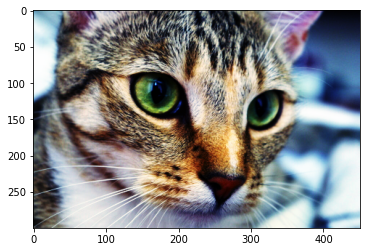

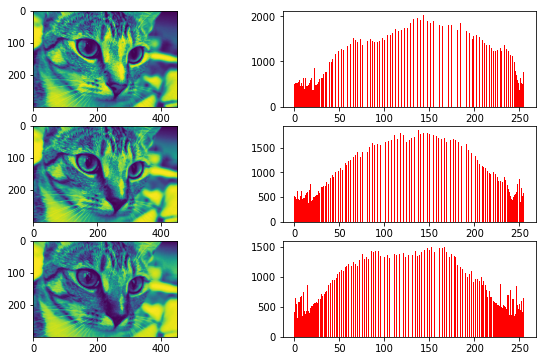

In [18]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

img_RGB_Original = imageio.imread('imageio:chelsea.png')  # Guardo la imagen RGB
img_RGB = img_RGB_Original
# Separo los canales
img_R = img_RGB_Original[:,:,0]  # Guardo el canal R
img_G = img_RGB_Original[:,:,1]  # Guardo el canal G
img_B = img_RGB_Original[:,:,2]  # Guardo el canal B

def eqHistograma(canal):
	# Genera el histograma del canal
	hist, _ = np.histogram(canal.flatten(), 256, [0, 256])

	# Genera la distribucion acumulada
	cdf = hist.cumsum()

	# Saca los valores igual a cero
	cdf_masked = np.ma.masked_equal(cdf, 0)

	# Aplica la transformacion de ecualizacion
	cdf_masked = ( cdf_masked - cdf_masked.min() )*255/( cdf_masked.max() - cdf_masked.min() )

	#Rellena los valores previamente enmascarados con ceros
	cdf = np.ma.filled(cdf_masked,0).astype('uint8')

	#Aplica la ecualización a los píxeles de la imagen original
	resultado = cdf[canal]

	return resultado
 
img_R_eq = eqHistograma(img_R) 
img_G_eq = eqHistograma(img_G) 
img_B_eq = eqHistograma(img_B)

# Imagen modificada
img_RGB[:,:,0] = img_R_eq
img_RGB[:,:,1] = img_G_eq
img_RGB[:,:,2] = img_B_eq

plt.imshow(img_RGB)

fig, ax = plt.subplots(3,2)
fig.set_size_inches(10,6)

ax[0,0].imshow(img_R_eq)
ax[1,0].imshow(img_G_eq)
ax[2,0].imshow(img_B_eq)

ax[0,1].hist(img_R_eq.flatten(),256,[0,256], color = 'r')
ax[1,1].hist(img_G_eq.flatten(),256,[0,256], color = 'r')
ax[2,1].hist(img_B_eq.flatten(),256,[0,256], color = 'r')

plt.show()